# Exercise 3 : Exploratory Analysis

In [7]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

## *Problem 1 : Analysis of Numeric Variables*

In [8]:
traindata = pd.read_csv('train.csv')
traindata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
houseData = pd.DataFrame(traindata[['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'SalePrice']])

lotarea = pd.DataFrame(traindata['LotArea'])
grlivearea = pd.DataFrame(traindata['GrLivArea'])
totalbsmtsf = pd.DataFrame(traindata['TotalBsmtSF'])
garagearea = pd.DataFrame(traindata['GarageArea'])

<Axes: >

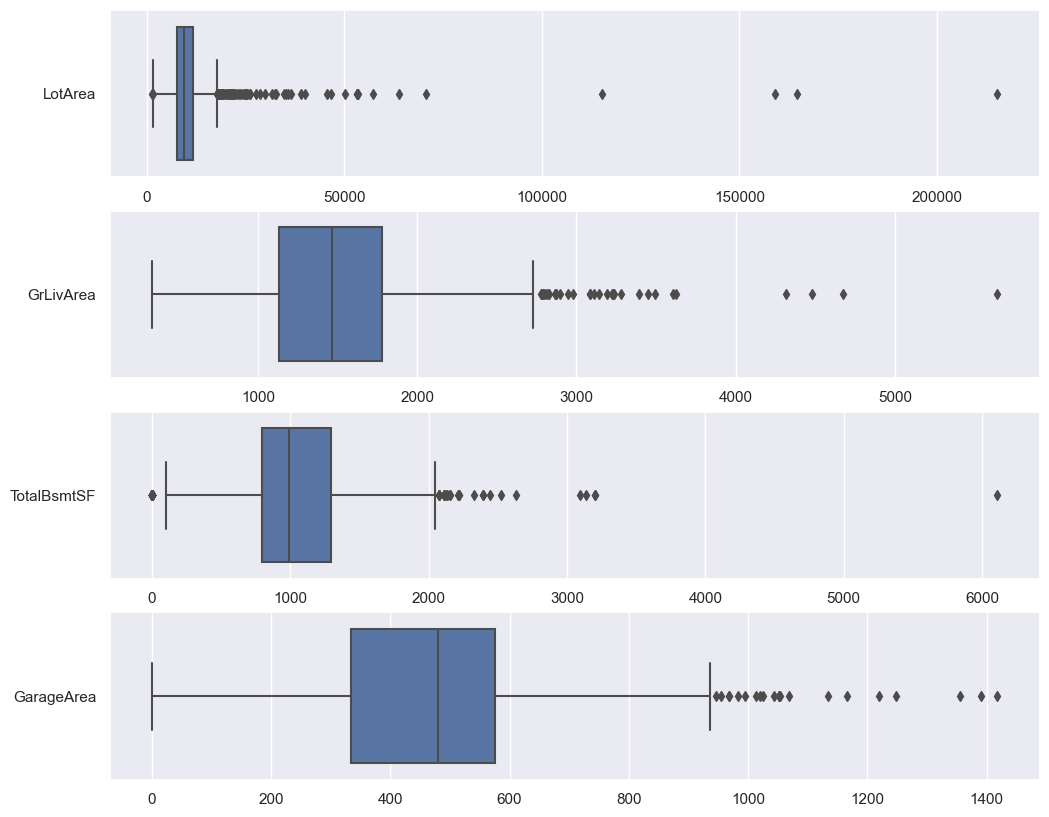

In [12]:
f, axes = plt.subplots(4, figsize=(12, 10))

sb.boxplot(data = lotarea, orient = "h", ax = axes[0])
sb.boxplot(data = grlivearea, orient = "h", ax = axes[1])
sb.boxplot(data = totalbsmtsf, orient = "h", ax = axes[2])
sb.boxplot(data = garagearea, orient = "h", ax = axes[3])

In [15]:
Q1 = houseData.quantile(0.25)
Q3 = houseData.quantile(0.75)
IQR = Q3 - Q1

outlier = (houseData < Q1 - 1.5*IQR) | (houseData > Q3 + 1.5*IQR)

outlier.sum()

LotArea        69
GrLivArea      31
TotalBsmtSF    61
GarageArea     21
SalePrice      61
dtype: int64

In [16]:
houseData.skew()

LotArea        12.207688
GrLivArea       1.366560
TotalBsmtSF     1.524255
GarageArea      0.179981
SalePrice       1.882876
dtype: float64

In [38]:
houseData.corr()

#sb.heatmap(houseData.corr(), annot = True)

,LotArea,GrLivArea,TotalBsmtSF,GarageArea,SalePrice
LotArea,1.000000,0.263116,0.260833,0.180403,0.263843
GrLivArea,0.263116,1.000000,0.454868,0.468997,0.708624
TotalBsmtSF,0.260833,0.454868,1.000000,0.486665,0.613581
GarageArea,0.180403,0.468997,0.486665,1.000000,0.623431
SalePrice,0.263843,0.708624,0.613581,0.623431,1.000000


### a) Which of these variables has the maximum number of outliers as per box-plot? How many outliers does it have?

LotArea has the maximum number of outlisers as per box-plot. 69 outliers.

### b) Which of these variables is the most skewed from a regular normal distribution? Is the skew positive or negative?

GarageArea is the most skewed from a regular normal distribution. Positive skew.

### c) Choose the top two variables that you think will help us the most in predicting ‘SalePrice’ of houses in this data.

GrLivArea and GarageArea would help us the most in predicting 'SalePrice'.

## *Problem 2 : Analysis of Categorical Variables*

In [18]:
houseCatData = pd.DataFrame(traindata[['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual']])
houseCatData

,MSSubClass,Neighborhood,BldgType,OverallQual
0,60,CollgCr,1Fam,7
1,20,Veenker,1Fam,6
2,60,CollgCr,1Fam,7
3,70,Crawfor,1Fam,7
4,60,NoRidge,1Fam,8
...,...,...,...,...
1455,60,Gilbert,1Fam,6
1456,20,NWAmes,1Fam,6
1457,70,Crawfor,1Fam,7
1458,20,NAmes,1Fam,5


In [19]:
houseCatData = houseCatData.astype('category')

In [20]:
houseCatData.describe()

,MSSubClass,Neighborhood,BldgType,OverallQual
count,1460,1460,1460,1460
unique,15,25,5,10
top,20,NAmes,1Fam,5
freq,536,225,1220,397


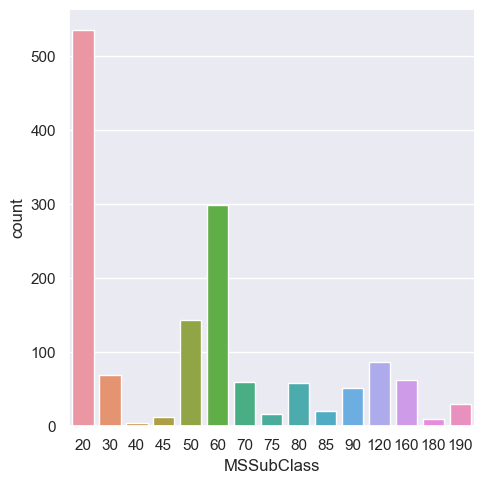

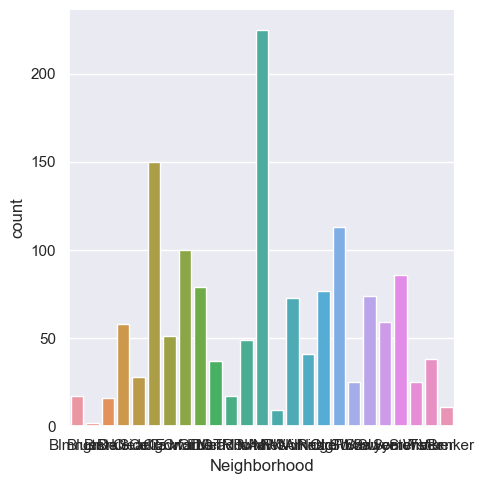

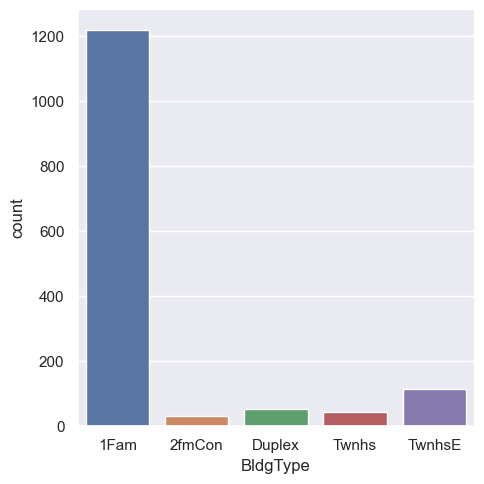

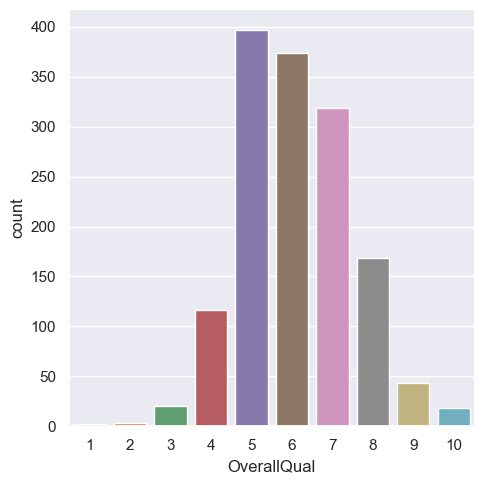

In [25]:
sb.catplot(data = houseCatData , x = 'MSSubClass', kind = "count")
sb.catplot(data = houseCatData , x = 'Neighborhood', kind = "count")
sb.catplot(data = houseCatData , x = 'BldgType', kind = "count")
sb.catplot(data = houseCatData , x = 'OverallQual', kind = "count")

<Axes: xlabel='SalePrice', ylabel='MSSubClass'>

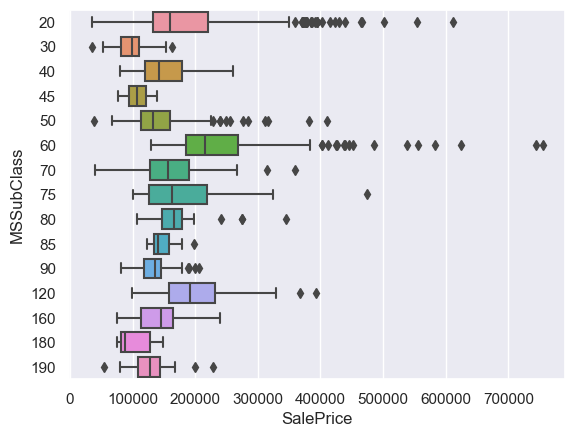

In [27]:
saleprice = pd.DataFrame(traindata['SalePrice'])

combinedData = pd.concat([saleprice, houseCatData], axis = 'columns')

sb.boxplot(data = combinedData, x = 'SalePrice', y = 'MSSubClass')

<Axes: xlabel='SalePrice', ylabel='Neighborhood'>

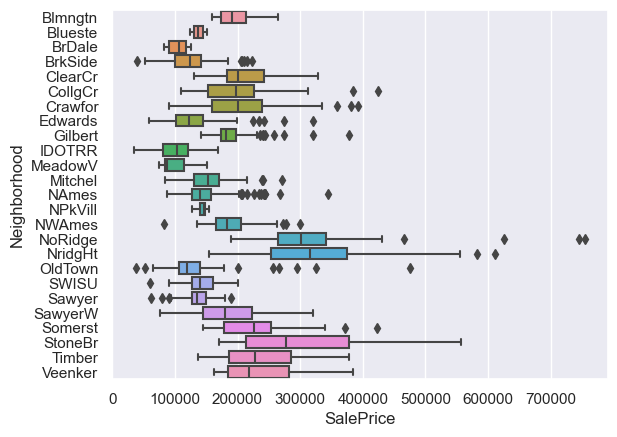

In [28]:
sb.boxplot(data = combinedData, x = 'SalePrice', y = 'Neighborhood')

<Axes: xlabel='SalePrice', ylabel='BldgType'>

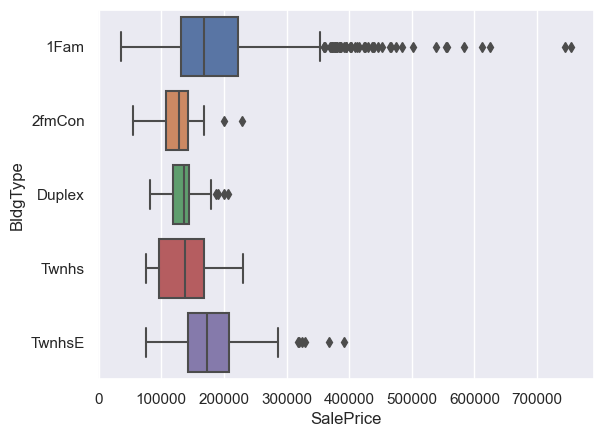

In [29]:
sb.boxplot(data = combinedData, x = 'SalePrice', y = 'BldgType')

<Axes: xlabel='SalePrice', ylabel='OverallQual'>

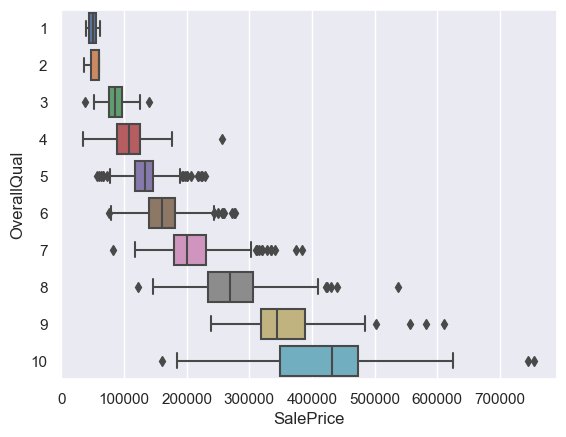

In [30]:
sb.boxplot(data = combinedData, x = 'SalePrice', y = 'OverallQual')

### a) Which of these variables has the highest number of levels? Which of the levels has the highest number of houses?

Neighborhood has the highest number of levels.
1Fam : Single-family Detached building type has the highest number of houses.

### b) Choose the top two variables that you think will help us the most in predicting ‘SalePrice’ of houses in this data.

OverallQual and BldgType would help us the most in predicting 'SalePrice' of house.

## Problem 3 : Interesting Questions for EDA

In [31]:
remod = pd.DataFrame(traindata['YearRemodAdd'])

remod = remod.astype('category')

<Axes: xlabel='SalePrice', ylabel='YearRemodAdd'>

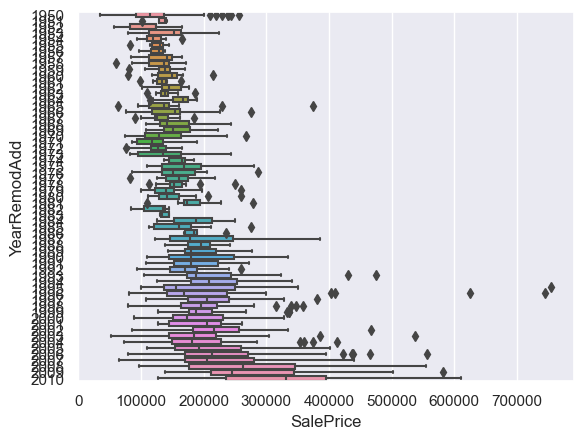

In [32]:
combineData = pd.concat([saleprice, remod], axis = 'columns')

sb.boxplot(data = combineData , x = "SalePrice", y = 'YearRemodAdd')

### Choose any ONE of the following questions to answer.


### b) Does the SalePrice of a house get affected by how recently it got Remodeled? Justify your answer using EDA.

The SalePrice of a house does get affected by how recently it got Remodeled. The more recent the house is remodeled, generally, the higher the sale price.
The boxplot graph is relatively linear.